# **1. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [9]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# **2. Memuat Dataset dari Hasil Clustering**

Memuat dataset hasil clustering dari file CSV ke dalam variabel DataFrame.

In [10]:
df_clustering = pd.read_csv('Dataset_clustering.csv')

df_clustering.head()

,deposit,monthly_rent,room_qty,unit_area,has_elevator,building_floor_count,unit_floor,has_storage_area,property_age,Cluster
0,36000000.0,864000.0,1.0,60,True,4.0,2.0,False,6.0,3
1,28800000.0,1296000.0,1.0,45,True,4.0,1.0,True,4.0,0
2,122400000.0,0.0,2.0,86,True,4.0,5.0,False,5.0,2
3,61920000.0,0.0,1.0,58,False,4.0,0.0,False,25.0,3
4,86400000.0,0.0,1.0,42,True,4.0,1.0,True,0.0,0


# **3. Data Splitting**

Tahap Data Splitting bertujuan untuk memisahkan dataset menjadi dua bagian: data latih (training set) dan data uji (test set).

In [11]:
X = df_clustering.drop('Cluster', axis=1)
y = df_clustering['Cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f'Ukuran data train: {X_train.shape}')
print(f'Ukuran data test: {X_test.shape}')

Ukuran data train: (2429, 9)
Ukuran data test: (608, 9)


# **4. Membangun Model Klasifikasi**


## **a. Membangun Model Klasifikasi**

Setelah memilih algoritma klasifikasi yang sesuai, langkah selanjutnya adalah melatih model menggunakan data latih.

Berikut adalah rekomendasi tahapannya.
1. Pilih algoritma klasifikasi yang sesuai, seperti Logistic Regression, Decision Tree, Random Forest, atau K-Nearest Neighbors (KNN).
2. Latih model menggunakan data latih.

### **Melatih Model Klasifikasi dengan Algoritma Logistic Regression**

**Logistic Regression** adalah salah satu algoritma klasifikasi yang paling sederhana dan sering digunakan untuk model klasifikasi biner atau multi-kelas. Algoritma ini bekerja dengan menghitung probabilitas suatu objek masuk ke dalam kelas tertentu, dan hasilnya dipetakan ke dalam nilai 0 atau 1 (untuk klasifikasi biner), atau lebih dari dua kelas (untuk klasifikasi multi-kelas).

In [12]:
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

### **Melatih Model Klasifikasi dengan Algoritma Random Forest**

**Random Forest** adalah algoritma klasifikasi berbasis ensemble learning yang menggabungkan banyak pohon keputusan (decision trees). Setiap pohon keputusan pada Random Forest dibangun dengan menggunakan subset acak dari data pelatihan, dan akhirnya hasil dari semua pohon keputusan digabungkan untuk memberikan hasil prediksi.

In [13]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Tulis narasi atau penjelasan algoritma yang Anda gunakan.

## **b. Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Lakukan prediksi menggunakan data uji.
2. Hitung metrik evaluasi seperti Accuracy dan F1-Score (Opsional: Precision dan Recall).
3. Buat confusion matrix untuk melihat detail prediksi benar dan salah.

### **Prediksi menggunakan Data Uji**

#### Algoritma Logistic Regression

In [15]:
y_pred_logreg = logreg.predict(X_test)

#### Algoritma Random Forest

In [16]:
y_pred_rf = rf.predict(X_test)

### **Hitung Metrik Evaluasi**

In [17]:
# Menghitung metrik evaluasi untuk Logistic Regression
accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')

# Menghitung metrik evaluasi untuk Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf, average='weighted')
recall_rf = recall_score(y_test, y_pred_rf, average='weighted')
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Membuat DataFrame untuk menampilkan hasil evaluasi
evaluation_results = pd.DataFrame({
    'Algorithm': ['Logistic Regression', 'Random Forest'],
    'Accuracy': [accuracy_logreg, accuracy_rf],
    'Precision': [precision_logreg, precision_rf],
    'Recall': [recall_logreg, recall_rf],
    'F1 Score': [f1_logreg, f1_rf]
})

print(evaluation_results)

             Algorithm  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.391447   0.153231  0.391447  0.220247
1        Random Forest  0.998355   0.998362  0.998355  0.998354


c:\Users\nugro\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### **Membuat Confusion Matrix**

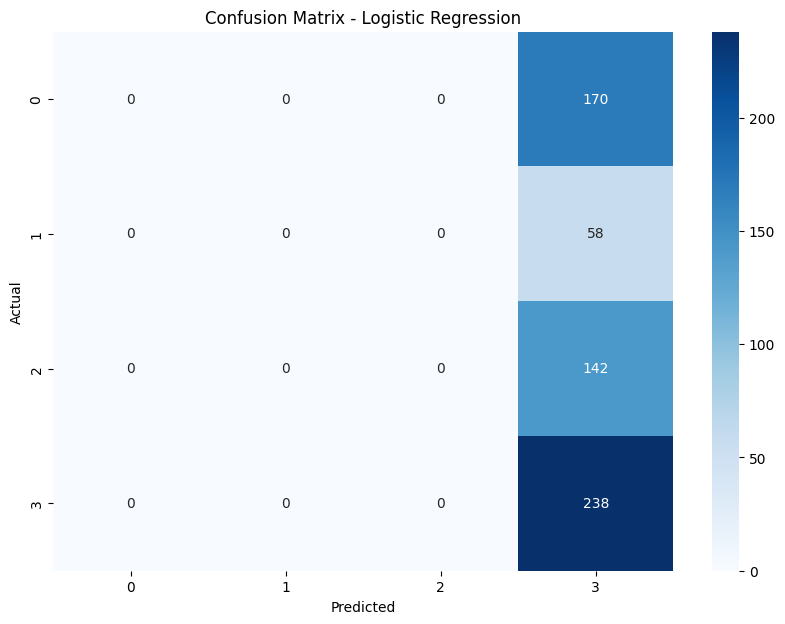

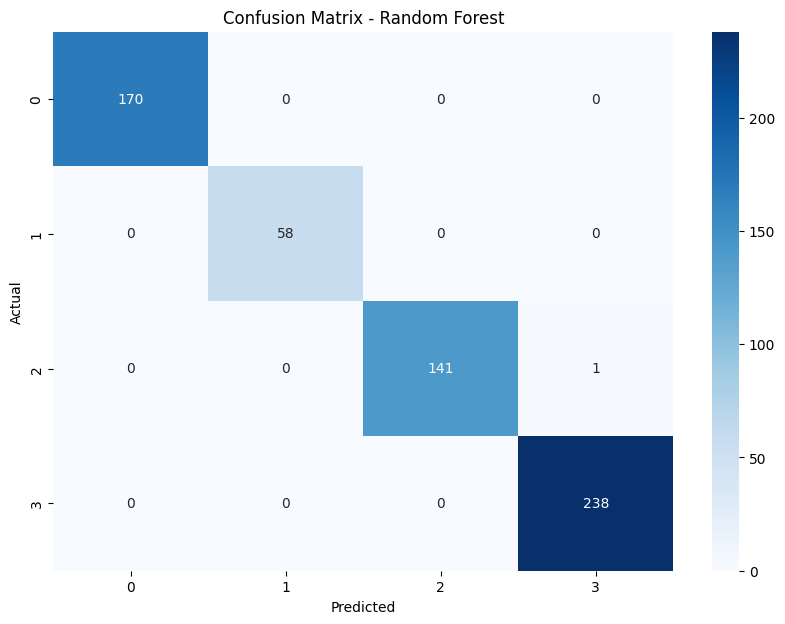

In [18]:
# Membuat confusion matrix untuk Logistic Regression
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_logreg, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Membuat confusion matrix untuk Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 7))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

Dari hasil analisis confusion matrix terebut, dapat dilihat dengan jelas bahwa Algoritma Random Forest memiliki akurasi yang lebih baik dibandingkan dengan Algoritma Logistic Regression.

Tulis hasil evaluasi algoritma yang digunakan, jika Anda menggunakan 2 algoritma, maka bandingkan hasilnya.

## **c. Tuning Model Klasifikasi (Optional)**

Gunakan GridSearchCV, RandomizedSearchCV, atau metode lainnya untuk mencari kombinasi hyperparameter terbaik

In [6]:
#Type your code here

## **d. Evaluasi Model Klasifikasi setelah Tuning (Optional)**

Berikut adalah rekomendasi tahapannya.
1. Gunakan model dengan hyperparameter terbaik.
2. Hitung ulang metrik evaluasi untuk melihat apakah ada peningkatan performa.

In [7]:
#Type your code here

## **e. Analisis Hasil Evaluasi Model Klasifikasi**

Berikut adalah **rekomendasi** tahapannya.
1. Bandingkan hasil evaluasi sebelum dan setelah tuning (jika dilakukan).
2. Identifikasi kelemahan model, seperti:
  - Precision atau Recall rendah untuk kelas tertentu.
  - Apakah model mengalami overfitting atau underfitting?
3. Berikan rekomendasi tindakan lanjutan, seperti mengumpulkan data tambahan atau mencoba algoritma lain jika hasil belum memuaskan.

### **Identifikasi Kelemahan Model**
- Secara keseluruhan dilihat berdasarkan metrik evaluasinya, algoritma Ranfom Forest memiliki nilai yang lebih tinggi dari algoritma Logistic Regression dari accuracy, precision, recall, dan f1 score. Bahkan jika dilihat pada Confusion Matrix nya, algoritma Logistic Regression hanya menghasikan prediksi pada cluster 3.
- Sehingga dapat disimpulkan algoritma Logistic Regression ini mengalami underfitting.

### **Rekomendasi Lanjutan**
Untuk memperbagus klasifikasi ini, saya menyarankan untuk mengumpulkan data tambahan. Melihat karena data ini memiliki fitur yang banyak, maka lebih baik memperbanyak data untuk training data nya.